In [1]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('updateddataset.csv')
data.head(5)

,year,Free State,Gauteng,Western Cape,Eastern Cape,KwaZulu-Natal,Limpopo,Mpumalanga,North West,Northern Cape,Education,Awareness,Settlement
0,1901,16.87,15.15,16.19,15.83,15.17,17.07,19.82,16.78,17.81,2,0,0
1,1902,16.75,15.00,16.18,15.65,15.00,16.92,19.92,16.80,17.72,1,0,1
2,1903,16.63,14.98,16.29,15.24,14.82,16.98,20.08,16.92,17.79,2,1,0
3,1904,16.69,15.05,16.01,15.58,15.07,17.03,19.54,16.63,17.59,4,1,0
4,1905,16.81,15.09,16.26,15.65,15.01,16.98,19.99,16.85,17.85,5,0,0


In [4]:
data.describe()

,year,Free State,Gauteng,Western Cape,Eastern Cape,KwaZulu-Natal,Limpopo,Mpumalanga,North West,Northern Cape,Education,Awareness,Settlement
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,1961.000000,17.535041,15.928430,16.795289,16.418512,15.906860,17.854298,20.324711,17.342727,18.449587,3.099174,0.545455,0.512397
std,35.073732,0.583148,0.656507,0.621264,0.540453,0.591908,0.647131,0.574200,0.602171,0.638794,1.445712,0.500000,0.501925
min,1901.000000,16.390000,14.660000,15.590000,15.240000,14.740000,16.470000,19.180000,16.080000,17.210000,1.000000,0.000000,0.000000
25%,1931.000000,17.120000,15.470000,16.340000,16.010000,15.500000,17.440000,19.950000,16.900000,17.990000,2.000000,0.000000,0.000000
50%,1961.000000,17.520000,15.940000,16.750000,16.370000,15.920000,17.830000,20.260000,17.280000,18.420000,3.000000,1.000000,1.000000
75%,1991.000000,17.810000,16.310000,17.130000,16.730000,16.200000,18.260000,20.660000,17.710000,18.810000,4.000000,1.000000,1.000000
max,2021.000000,19.270000,17.830000,18.710000,17.950000,17.630000,19.590000,22.010000,19.100000,20.380000,5.000000,1.000000,1.000000


In [6]:
education_counts = data['Education'].value_counts()
Awareness_counts = data['Awareness'].value_counts()
Settlement_counts = data['Settlement'].value_counts()

print(f"Descriptive statistics for education: \n{education_counts}")
print(f"Descriptive statistics for Awareness: \n{Awareness_counts}")
print(f"Descriptive statistics for Settlement: \n{Settlement_counts}")


Descriptive statistics for education: 
Education
5    29
3    28
1    24
4    21
2    19
Name: count, dtype: int64
Descriptive statistics for Awareness: 
Awareness
1    66
0    55
Name: count, dtype: int64
Descriptive statistics for Settlement: 
Settlement
1    62
0    59
Name: count, dtype: int64


In [7]:
correlation_matrix = data[['Education', 'Awareness', 'Settlement', 'Free State',\
                                'Gauteng', 'Western Cape', 'Eastern Cape', 'KwaZulu-Natal','Limpopo',\
                                    'Mpumalanga','North West', 'Northern Cape']].corr()
print(correlation_matrix)

               Education  Awareness  Settlement  Free State   Gauteng  \
Education       1.000000   0.108995    0.159070    0.065134  0.075674   
Awareness       0.108995   1.000000   -0.126785    0.030789  0.030049   
Settlement      0.159070  -0.126785    1.000000   -0.009184 -0.010183   
Free State      0.065134   0.030789   -0.009184    1.000000  0.989572   
Gauteng         0.075674   0.030049   -0.010183    0.989572  1.000000   
Western Cape    0.069925   0.044289   -0.029876    0.968081  0.978762   
Eastern Cape    0.049678   0.007345    0.023109    0.937879  0.888456   
KwaZulu-Natal   0.081877   0.006399    0.013035    0.985140  0.974298   
Limpopo         0.103400   0.009436   -0.006579    0.972099  0.977904   
Mpumalanga      0.055047   0.062960   -0.040829    0.926130  0.932520   
North West      0.079137   0.034597   -0.033061    0.959323  0.967914   
Northern Cape   0.053554   0.048458   -0.037801    0.979848  0.988227   

               Western Cape  Eastern Cape  KwaZulu

                            OLS Regression Results                            
Dep. Variable:                   year   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     38.14
Date:                Wed, 20 Mar 2024   Prob (F-statistic):           2.60e-33
Time:                        21:41:52   Log-Likelihood:                -501.46
No. Observations:                 121   AIC:                             1029.
Df Residuals:                     108   BIC:                             1065.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1239.6983    121.124     10.235

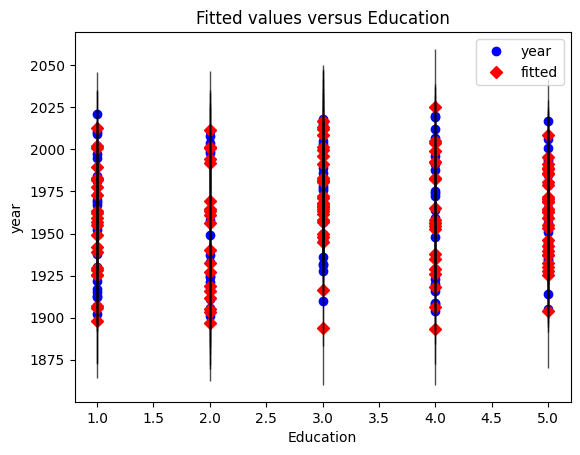

In [10]:
# build Linear Regression model for regression analysis
import statsmodels.api as sm
#define independent and dependent variables
X= data[['Education', 'Awareness', 'Settlement', 'Free State',\
                                'Gauteng', 'Western Cape', 'Eastern Cape', 'KwaZulu-Natal','Limpopo',\
                                    'Mpumalanga','North West', 'Northern Cape']]
#add constant to the model
X = sm.add_constant(X)
#dependent variable
y = data['year']

#fit the model
model = sm.OLS(y, X).fit()
#summary of the model
import matplotlib.pyplot as plt
print(model.summary())
import statsmodels.graphics.regressionplots as smg

# fit the model
model = sm.OLS(y, X).fit()

# plot the fitted model
fig, ax = plt.subplots()
smg.plot_fit(model, 'Education', ax=ax)
plt.show()


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Awareness   No. Observations:                  121
Model:                            GLM   Df Residuals:                      108
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -77.236
Date:                Wed, 20 Mar 2024   Deviance:                       154.47
Time:                        21:50:04   Pearson chi2:                     123.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.09642
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -19.1470     21.987     -0.871

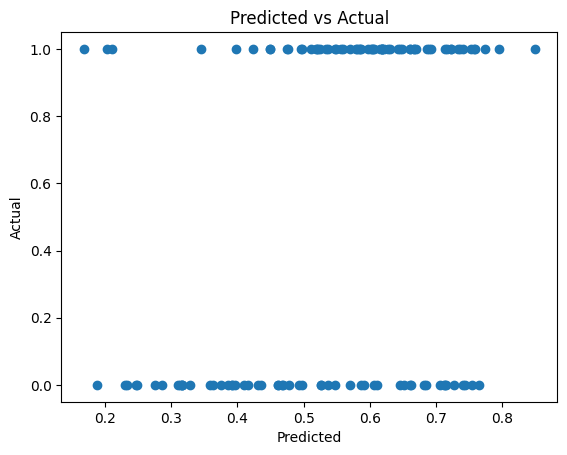

In [14]:
# build logistic regression (GLM with logit link function)
import statsmodels.api as sm
#define independent and dependent variables
X= data[['Education', 'year', 'Settlement', 'Free State',\
                                'Gauteng', 'Western Cape', 'Eastern Cape', 'KwaZulu-Natal','Limpopo',\
                                    'Mpumalanga','North West', 'Northern Cape']]
#add constant to the model
X = sm.add_constant(X)

#dependent variable
y = data['Awareness']

#fit the model
model = sm.GLM(y, X, family=sm.families.Binomial()).fit()
#summary of the model
print(model.summary())
#plot the model
import matplotlib.pyplot as plt
plt.plot(model.predict(X), y, 'o')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted vs Actual")
plt.show()

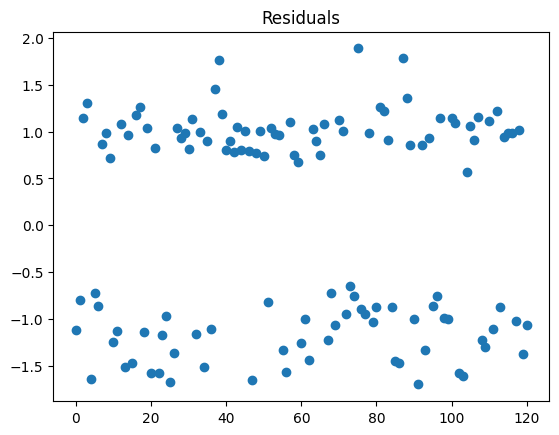

In [15]:
#plot the residuals
import matplotlib.pyplot as plt
plt.plot(model.resid_deviance, 'o')
plt.title("Residuals")
plt.show()

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Awareness   No. Observations:                  121
Model:                            GLM   Df Residuals:                      118
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -82.546
Date:                Wed, 20 Mar 2024   Deviance:                       165.09
Time:                        21:55:16   Pearson chi2:                     121.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01354
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3995     10.313      0.427      0.6

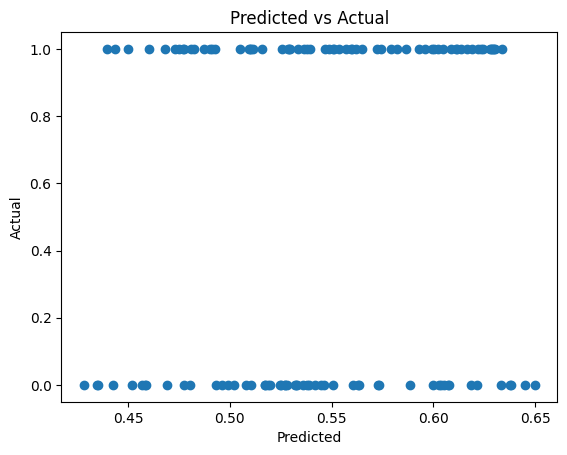

In [17]:
#y = awareness, x1 = education, x2 = year
#build logistic regression (GLM with logit link function)
import statsmodels.api as sm
#define independent and dependent variables
X = data[['Education', 'year']]
#add constant to the model
X = sm.add_constant(X)
y = data['Awareness']
#fit the model
model = sm.GLM(y, X, family=sm.families.Binomial()).fit()
#summary of the model
print(model.summary())
#plot the model
import matplotlib.pyplot as plt
plt.plot(model.predict(X), y, 'o')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted vs Actual")
plt.show()

In [ ]:
#plot the 